In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

c:\Users\User\Anaconda3\envs\AmazonProject\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_excel("Data\cleaned_data.xlsx")

In [3]:
df.iloc[:5,:10]

,Title,Authors,Price ($),Language,NumOfPages,NumOfReviews,BookLink,search_word,avg_review,5_star
0,Building Analytics Teams: Harnessing analytics...,John K. Thompson,35.99,English,394.0,119,https://www.amazon.com//gp/slredirect/picassoR...,Data Analytics,4.5,73%
1,SQL QuickStart Guide: The Simplified Beginner'...,Walter Shields,22.49,English,249.0,1368,https://www.amazon.com//gp/slredirect/picassoR...,Data Analytics,4.6,72%
2,"Data Analytics, Data Visualization & Communica...",Elizabeth Clarke,32.12,English,528.0,22,https://www.amazon.com//gp/slredirect/picassoR...,Data Analytics,4.6,83%
3,Hands-On Data Analysis with Pandas: A Python d...,Stefanie Molin,35.67,English,788.0,72,https://www.amazon.com//gp/slredirect/picassoR...,Data Analytics,4.3,65%
4,Blueprints for Text Analytics Using Python: Ma...,Christian Winkler Jens Albrecht,48.99,English,424.0,36,https://www.amazon.com//Blueprints-Text-Analyt...,Data Analytics,4.8,82%


### Most Reviewed & Highly Rated Books

In [4]:
best_books = df[df["avg_review"]>4.7].nlargest(n=5,columns=["NumOfReviews","avg_review"])[["Title","Authors","Price ($)","NumOfPages",
                                                                                           "NumOfReviews","avg_review"]].copy()

for idx in range(0, 5):
    print("\033[1mBook N{}\033[0m:".format(idx+1))
    print("\033[1mTitle\033[0m: " + best_books.iloc[idx,0])
    print("\033[1mAuthor/Authors\033[0m: {}".format(best_books.iloc[idx,1]))
    print("\033[1mTotal Reviews\033[0m: {} (Average {})".format(best_books.iloc[idx,4], best_books.iloc[idx,5]))
    print("---------------------------------------------------------------------------------------------------------------------------------------")

Book N1:
Title: Designing Data-Intensive Applications: The Big Ideas Behind Reliable, Scalable, and Maintainable Systems
Author/Authors: Martin Kleppmann
Total Reviews: 3498 (Average 4.8)
---------------------------------------------------------------------------------------------------------------------------------------
Book N2:
Title: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems
Author/Authors: Aurélien Géron
Total Reviews: 3148 (Average 4.8)
---------------------------------------------------------------------------------------------------------------------------------------
Book N3:
Title: Deep Learning for Coders with Fastai and PyTorch: AI Applications Without a PhD
Author/Authors: Jeremy Howard  Sylvain Gugger
Total Reviews: 439 (Average 4.8)
---------------------------------------------------------------------------------------------------------------------------------------
Book N4:
Title: The

In [5]:
DL_books = df[df['Title'].str.contains("Deep Learning")]

# ML books with most reviews and highest average rating
best_DL_books = DL_books.nlargest(5, ["NumOfReviews","avg_review"])[["Title","Authors","Price ($)","NumOfPages","NumOfReviews","avg_review"]]
for idx in range(0, 5):
    print("\033[1mBook N{}\033[0m:".format(idx+1))
    print("\033[1mTitle\033[0m: " + best_DL_books.iloc[idx,0])
    print("\033[1mAuthor/Authors\033[0m: {}".format(best_DL_books.iloc[idx,1]))
    print("\033[1mTotal Reviews\033[0m: {} (Average {})".format(best_DL_books.iloc[idx,4], best_DL_books.iloc[idx,5]))
    print("---------------------------------------------------------------------------------------------------------------------------------------")

Book N1:
Title: Deep Learning (Adaptive Computation and Machine Learning series)
Author/Authors: Yoshua Bengio  Aaron Courville
Total Reviews: 1939 (Average 4.3)
---------------------------------------------------------------------------------------------------------------------------------------
Book N2:
Title: Deep Learning for Coders with Fastai and PyTorch: AI Applications Without a PhD
Author/Authors: Jeremy Howard  Sylvain Gugger
Total Reviews: 439 (Average 4.8)
---------------------------------------------------------------------------------------------------------------------------------------
Book N3:
Title: Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2, 3rd Edition
Author/Authors: Vahid Mirjalili  Sebastian Raschka
Total Reviews: 407 (Average 4.5)
---------------------------------------------------------------------------------------------------------------------------------------
Book N4:
Title: Deep Learning (The MIT

### Price vs Pages

ModuleNotFoundError: No module named 'statsmodels'

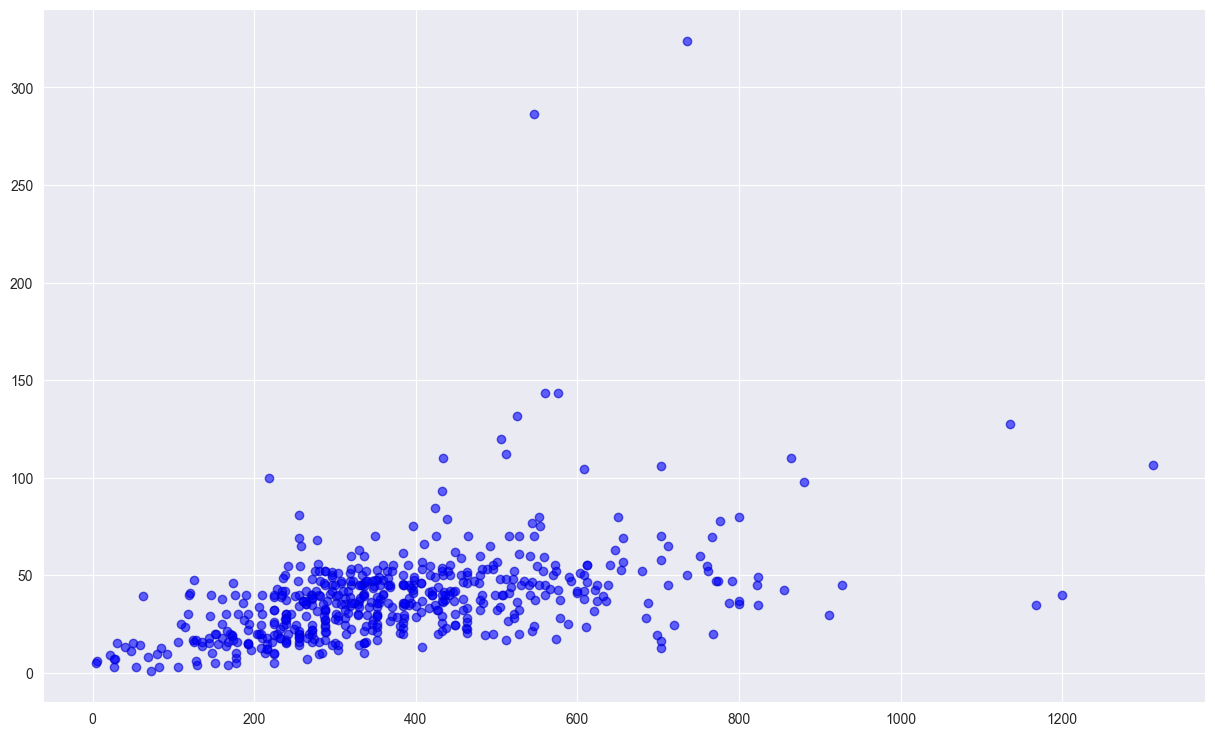

In [6]:
plt.figure(figsize=(15,9))
sns.regplot(x=df[df["Price ($)"]<600]["NumOfPages"], y=df[df["Price ($)"]<600]["Price ($)"],
            ci=None, robust=True, marker="o", color="b",
            scatter_kws={"color": "blue", "alpha": 0.6, "edgecolor": "mediumblue"}, line_kws={"color": "red", "linewidth": 3})
plt.title("Book Price vs Number of pages", size=25)
plt.xlabel("Number of Pages", size=15)
plt.ylabel("Price ($)", size=15)
plt.show()

### Price vs Number of Reviews

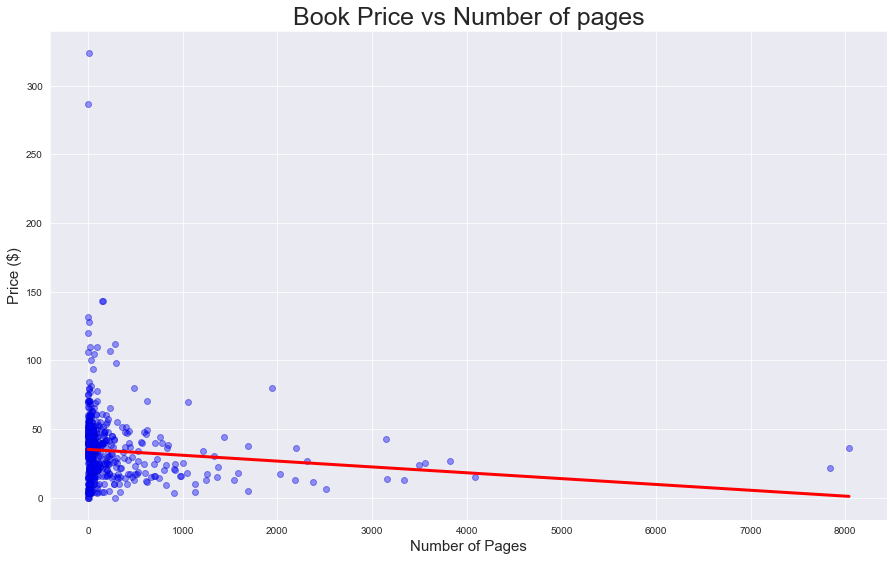

In [ ]:
plt.figure(figsize=(15,9))
sns.regplot(x=df[df["Price ($)"]<600]["NumOfReviews"], y=df[df["Price ($)"]<600]["Price ($)"],
            ci=None, robust=True, marker="o", color="b",
            scatter_kws={"color": "blue", "alpha": 0.4, "edgecolor": "mediumblue"}, line_kws={"color": "red", "linewidth": 3})
plt.title("Book Price vs Number of pages", size=25)
plt.xlabel("Number of Pages", size=15)
plt.ylabel("Price ($)", size=15)
plt.show()

### Clustering Books via Title

- To get Title embaddings, I will use pretrained model from Sbert.net (link below)
- (https://www.sbert.net/docs/pretrained_models.html)

In [7]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [8]:
encoded_vectors = []
for title in list(df["Title"]):
    encoded_vectors.append(model.encode(title))
encoded_vectors = np.array(encoded_vectors)
df["Title"].shape, encoded_vectors.shape

((647,), (647, 384))

In [9]:
sse = []
for num_of_cluster in range(2, 12):
    kmeans = KMeans(n_clusters=num_of_cluster, n_init=10, max_iter=500,
                    random_state=4444)
    kmeans.fit(encoded_vectors)
    sse.append(kmeans.inertia_)

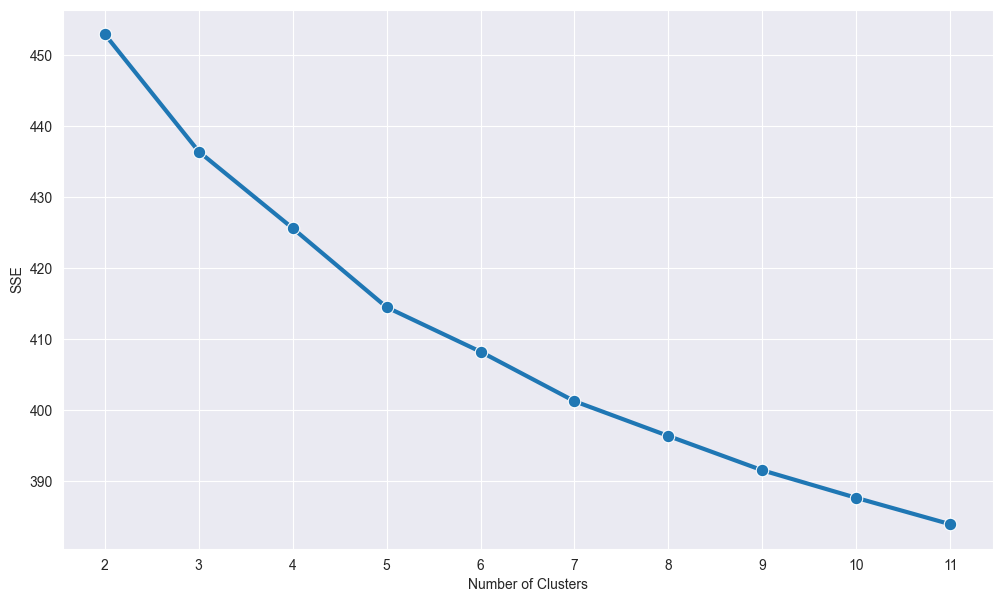

In [10]:
plt.figure(figsize=(12,7))
sns.lineplot(x=range(2,12), y=sse, linewidth=3, marker="o", markersize=9)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

- As Elbow Method suggests, probably 5 cluster would be good choice in this case

In [11]:
num_of_cluster = 5
kmeans = KMeans(n_clusters=num_of_cluster, n_init=10, max_iter=500,random_state=4444)
kmeans.fit(encoded_vectors)
preds = kmeans.labels_
print(preds.shape)

(647,)


In [12]:
df["Title_Clusters"] = preds

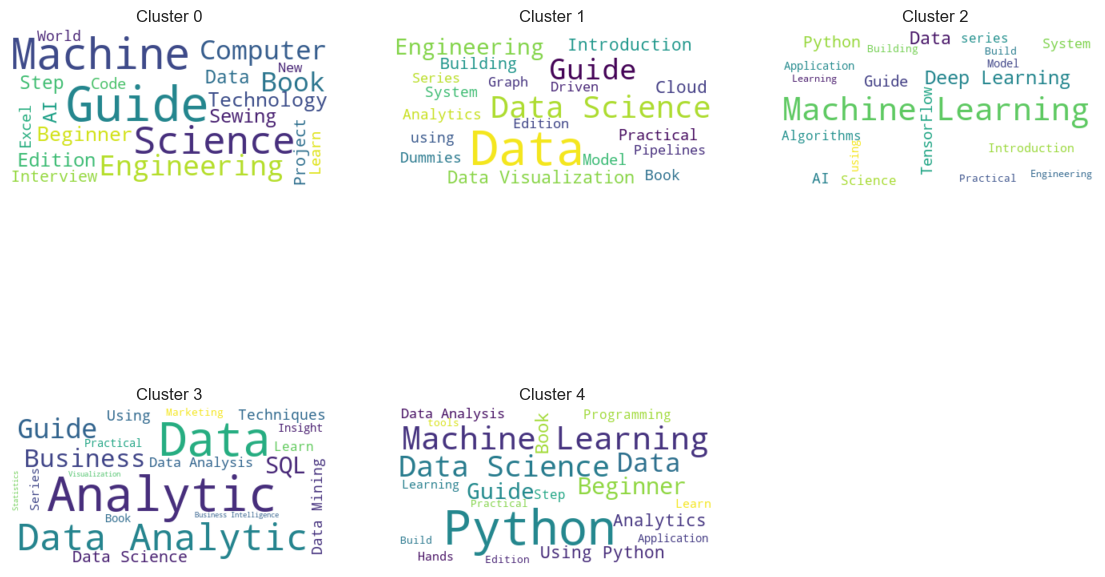

In [14]:
# Create wordclouds for clusters
plt.figure(figsize=(14,9))
from wordcloud import WordCloud

for k in range(num_of_cluster):
   text = df[df.Title_Clusters == k]['Title'].str.cat(sep=' ')
   wordcloud = WordCloud(max_font_size=60, max_words=20, background_color="white").generate(text)

   # Create subplot
   plt.subplot(2, 3, k+1).set_title("Cluster " + str(k)) 
   plt.plot()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
plt.show()

On the graph can see the most used words in clusters. Based on it we can derive some approximate conclusions about clusters:
- Cluster 1: consists more of a introductory books about machines and computer science;
- Cluster 2: mainly about data science;
- Cluster 3: mainly about Machine Learning & Deep learning;
- Cluster 4: mainly about Data analytics;
- Cluster 5: more about Python books.

### Text Summerization

For text summerization I will use bert extractive summerizer (link below)
- (https://pypi.org/project/bert-extractive-summarizer/)

In [29]:
# from summarizer import Summarizer
from summarizer.sbert import SBertSummarizer

In [30]:
bert_summerizer = SBertSummarizer()

In [31]:
print(df["com1"][0])

'I have been doing analytics directly for 3 years.  When I saw a post from a senior pro I follow saying I wish I had this book 10 years ago, I bought this book.  Add to that John has 30+ years in the biz, why would't I want to kick start my knowledge and cut years off my learning curve?  I cracked this book and have been devouring it; I'm not generally an avid reader but I ca't put this book down.  The tips herein are't how to make a million dollars doing analytics; they're lots of subtle tweaks to avoid potholes and make those small improvements that will get your projects completed successfully and in less time.  The running joke in the analytics and data science community is the crazy % of projects that do't see the light of day.  This book will help you be part of the small % that make transformational impacts in your business.As someone with 15+ years in my industry but 3 directly in analytics and being close to the inner workings of IT, I'm learning so much about how to be a succ

In [32]:
bert_summerizer(df["com1"][0], min_length=80)

"When I saw a post from a senior pro I follow saying I wish I had this book 10 years ago, I bought this book. As someone with 15+ years in my industry but 3 directly in analytics and being close to the inner workings of IT, I'm learning so much about how to be a successful in the analytics space. Guess what, it's not much different from the business side but there are a definitely key differences dealing with IT and technology developers vs. business people."

In [33]:
# now lets predict summeries of first comment of each book
comment_summeries = []
for comment in list(df["com1"]):
    if type(comment)!=type(np.nan):
        comment_summeries.append(bert_summerizer(comment, min_length=80))
        continue
    comment_summeries.append(np.nan)

In [34]:
df.shape, len(comment_summeries)

((647, 30), 647)

In [35]:
df["com1_summeries"] = comment_summeries

- Check how model worked on top books comments

In [36]:
for i in range(0, 3, 1):
    if len(df[["com1"]].iloc[i, 0])>400:
        print("\033[1mBook N{}\033[0m: {} by {}".format(i+1, df[["Title"]].iloc[i,0], df[["Authors"]].iloc[i,0]))
        print("\033[1mComment\033[0m")
        print(df[["com1"]].iloc[i, 0])
        print("\033[1mSummary\033[0m")
        print(df[["com1_summeries"]].iloc[i, 0])
        print("---------------------------------------------------------------------------------------------------------------------------------------")

Book N1: Building Analytics Teams: Harnessing analytics and artificial intelligence for business improvement by John K. Thompson
Comment
'I have been doing analytics directly for 3 years.  When I saw a post from a senior pro I follow saying I wish I had this book 10 years ago, I bought this book.  Add to that John has 30+ years in the biz, why would't I want to kick start my knowledge and cut years off my learning curve?  I cracked this book and have been devouring it; I'm not generally an avid reader but I ca't put this book down.  The tips herein are't how to make a million dollars doing analytics; they're lots of subtle tweaks to avoid potholes and make those small improvements that will get your projects completed successfully and in less time.  The running joke in the analytics and data science community is the crazy % of projects that do't see the light of day.  This book will help you be part of the small % that make transformational impacts in your business.As someone with 15+ 